In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import os
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer, TargetEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import spmatrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
import re
sys.path.append(os.path.abspath("../"))
from src.data.load_data import load_dataset
sys.path.append(os.path.abspath("../src")) 
from src.features.preprocess import deterministic_fe
from src.utils.helpers import other_titles,get_personal_title
from src.features.transformers import PersonalTitleTransformer
from src.features.pipe_config import preprocessing_pipeline
from src.utils.helpers import grid_search_res
from joblib import dump
%load_ext autoreload
%autoreload 2

In [3]:
train = load_dataset('../data/raw/train.csv')
test = load_dataset('../data/raw/test.csv')
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('Survived', axis=1)
y_test = test['Survived']

In [11]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
pipe = Pipeline([
    ('preprocess', preprocessing_pipeline()),
    ('model', AdaBoostClassifier())
])
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
cv = cross_validate(pipe, 
                    X=X_train,
                    y=y_train, 
                    return_train_score=True,
                    cv=skf,
                    scoring=scoring
                    )

In [14]:
pd.DataFrame(cv).mean()#.to_excel('../reports/model_outputs/train/adaBoost/base_ab_model.xlsx')

fit_time                    0.048222
score_time                  0.008908
test_accuracy               0.825549
train_accuracy              0.832978
test_precision_weighted     0.824902
train_precision_weighted    0.832202
test_recall_weighted        0.825549
train_recall_weighted       0.832978
test_f1_weighted            0.824742
train_f1_weighted           0.832305
dtype: float64

In [ ]:
param_grid = {'model__n_estimators': np.arange(100,1000,100),
              'model__learning_rate':list(np.linspace(0.01,1, 10)) + [1.5]}
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted',
}

gs = GridSearchCV(pipe,param_grid, scoring = scoring, cv=5, return_train_score=True, refit='f1',verbose=2, n_jobs=-1)

In [31]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


/opt/homebrew/Caskroom/miniforge/base/envs/titanic_env/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniforge/base/envs/titanic_env/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniforge/base/envs/titanic_env/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is

[CV] END .model__learning_rate=0.01, model__n_estimators=100; total time=   0.2s
[CV] END .model__learning_rate=0.01, model__n_estimators=100; total time=   0.2s
[CV] END .model__learning_rate=0.01, model__n_estimators=100; total time=   0.2s
[CV] END .model__learning_rate=0.01, model__n_estimators=100; total time=   0.2s
[CV] END .model__learning_rate=0.01, model__n_estimators=100; total time=   0.2s
[CV] END .model__learning_rate=0.01, model__n_estimators=200; total time=   0.2s
[CV] END .model__learning_rate=0.01, model__n_estimators=200; total time=   0.3s
[CV] END .model__learning_rate=0.01, model__n_estimators=200; total time=   0.3s
[CV] END .model__learning_rate=0.01, model__n_estimators=200; total time=   0.3s
[CV] END .model__learning_rate=0.01, model__n_estimators=300; total time=   0.4s
[CV] END .model__learning_rate=0.01, model__n_estimators=300; total time=   0.4s
[CV] END .model__learning_rate=0.01, model__n_estimators=200; total time=   0.4s
[CV] END .model__learning_ra

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model__learning_rate': [np.float64(0.01), np.float64(0.12), ...], 'model__n_estimators': array([100, 2...00, 800, 900])}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1_weighted', 'precision': 'precision_weighted', 'recall': 'recall_weighted'}"
,n_jobs,-1
,refit,'f1'
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,steps,"[('Deterministic_fe', ...), ('personal_title', ...), ...]"


In [32]:
gs.best_params_

{'model__learning_rate': np.float64(0.12),
 'model__n_estimators': np.int64(600)}

There is no sign of overfitting. I will try to introduce less variance to model 

In [42]:
gs_res_1 = pd.DataFrame(gs.cv_results_)
gs_res_1[gs_res_1['mean_test_f1']==max(gs_res['mean_test_f1'])].T

,14
mean_fit_time,0.634132
std_fit_time,0.028861
mean_score_time,0.043196
std_score_time,0.011565
param_model__learning_rate,0.12
...,...
split2_train_f1,0.834767
split3_train_f1,0.824314
split4_train_f1,0.820337
mean_train_f1,0.825999


In [43]:
param_grid = {'model__n_estimators': np.arange(600,2000,100),
              'model__learning_rate':list(np.linspace(0.12,0.5, 12))}
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted',
}

gs = GridSearchCV(pipe,param_grid, scoring = scoring, cv=5, return_train_score=True, refit='f1',verbose=2, n_jobs=-1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


/opt/homebrew/Caskroom/miniforge/base/envs/titanic_env/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniforge/base/envs/titanic_env/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniforge/base/envs/titanic_env/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is

[CV] END .model__learning_rate=0.12, model__n_estimators=600; total time=   1.0s
[CV] END .model__learning_rate=0.12, model__n_estimators=600; total time=   1.0s
[CV] END .model__learning_rate=0.12, model__n_estimators=600; total time=   1.0s
[CV] END .model__learning_rate=0.12, model__n_estimators=600; total time=   1.1s
[CV] END .model__learning_rate=0.12, model__n_estimators=600; total time=   1.1s
[CV] END .model__learning_rate=0.12, model__n_estimators=700; total time=   1.2s
[CV] END .model__learning_rate=0.12, model__n_estimators=700; total time=   1.1s
[CV] END .model__learning_rate=0.12, model__n_estimators=700; total time=   1.2s
[CV] END .model__learning_rate=0.12, model__n_estimators=700; total time=   1.2s
[CV] END .model__learning_rate=0.12, model__n_estimators=700; total time=   1.2s
[CV] END .model__learning_rate=0.12, model__n_estimators=800; total time=   1.3s
[CV] END .model__learning_rate=0.12, model__n_estimators=800; total time=   1.3s
[CV] END .model__learning_ra

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model__learning_rate': [np.float64(0.12), np.float64(0....4545454545454), ...], 'model__n_estimators': array([ 600, ..., 1800, 1900])}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1_weighted', 'precision': 'precision_weighted', 'recall': 'recall_weighted'}"
,n_jobs,-1
,refit,'f1'
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,steps,"[('Deterministic_fe', ...), ('personal_title', ...), ...]"


In [47]:
gs_2_best_model = gs.best_estimator_
gs.best_params_

{'model__learning_rate': np.float64(0.12),
 'model__n_estimators': np.int64(600)}

In [48]:
gs_res_2 = pd.DataFrame(gs.cv_results_)
gs_res_2[gs_res_2['mean_test_f1']==max(gs_res_2['mean_test_f1'])].T

,0
mean_fit_time,0.931926
std_fit_time,0.041347
mean_score_time,0.088834
std_score_time,0.024236
param_model__learning_rate,0.12
...,...
split2_train_f1,0.834767
split3_train_f1,0.824314
split4_train_f1,0.820337
mean_train_f1,0.825999


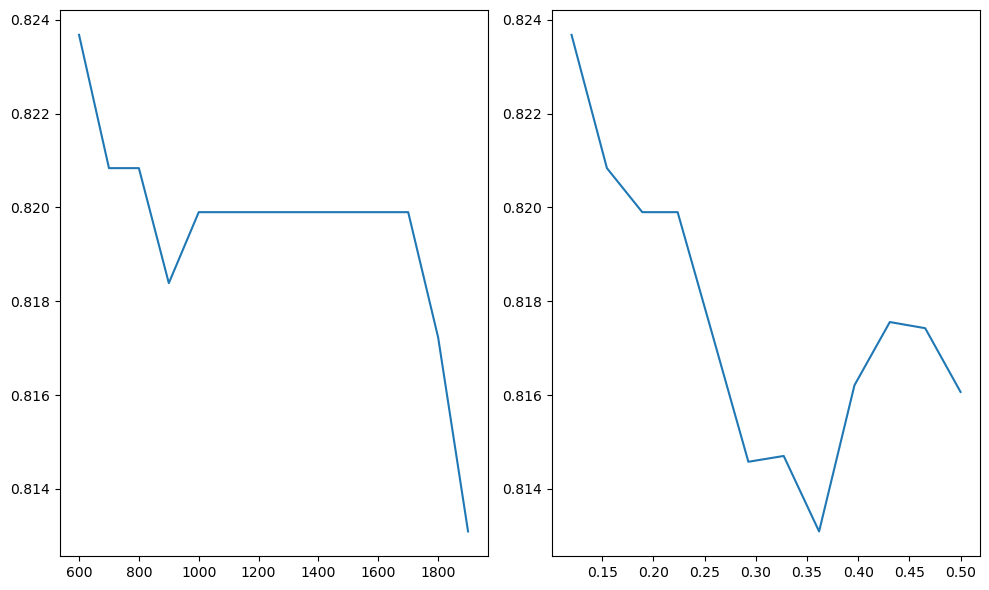

In [60]:
opt_lr = gs_res_2[gs_res_2['param_model__learning_rate'] == 0.12]
opt_nest = gs_res_2[gs_res_2['param_model__n_estimators'] == 600]
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(opt_lr['param_model__n_estimators'], opt_lr['mean_test_f1'])
plt.subplot(1,2,2)
plt.plot(opt_nest['param_model__learning_rate'], opt_nest['mean_test_f1'])
plt.tight_layout()

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       109
           1       0.70      0.78      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.79      0.79      0.79       178



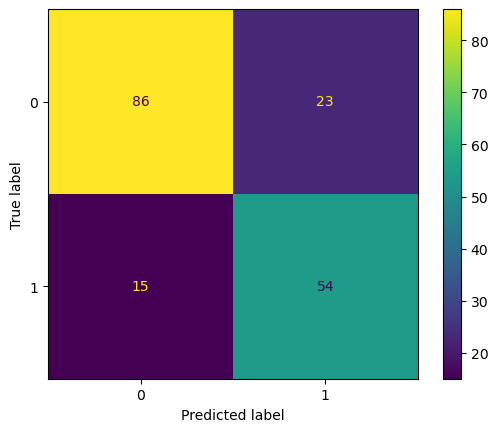

In [49]:
preds = gs_2_best_model.predict(X_test)
print(classification_report(y_test,preds))
ConfusionMatrixDisplay.from_predictions(y_test, preds)

## refit


In [ ]:
# gs_res_2[gs_res_2['mean_test_f1']==max(gs_res_2['mean_test_f1'])].T.to_excel('../reports/model_outputs/train/adaBoost/best_ab_model.xlsx')

In [73]:
X_train_names = gs_2_best_model.named_steps['preprocess'].transform(X_train).columns

<Axes: xlabel='None', ylabel='None'>

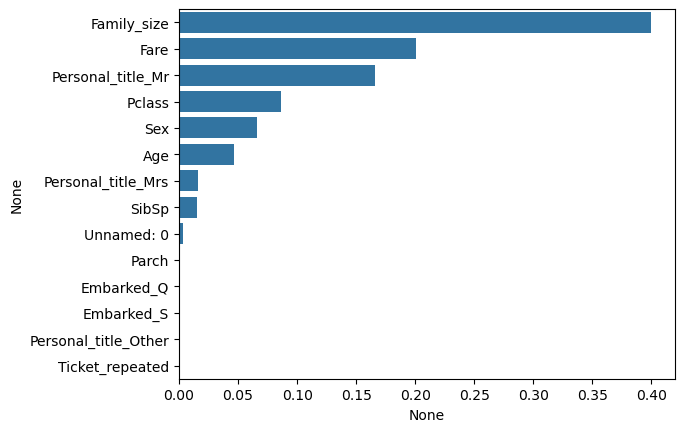

In [82]:
feat_imps = pd.Series(gs_2_best_model.named_steps['model'].feature_importances_,index=X_train_names).sort_values(ascending=False)

sns.barplot(x=feat_imps, y=feat_imps.index)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       109
           1       0.70      0.78      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.79      0.79      0.79       178



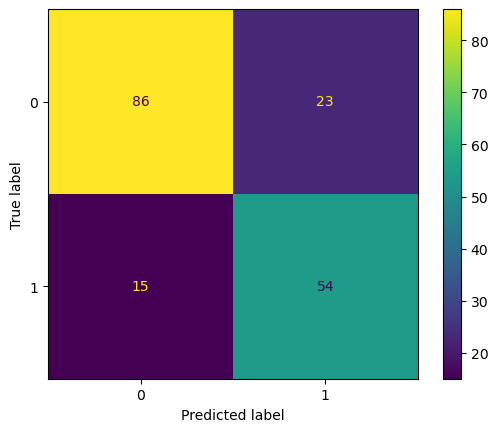

In [79]:
preds = gs_2_best_model.predict(X_test)
print(classification_report(y_test,preds))
ConfusionMatrixDisplay.from_predictions(y_test, preds)

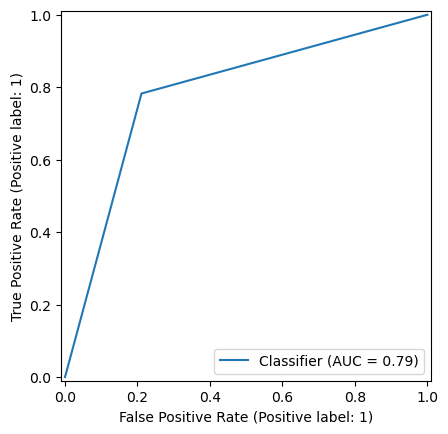

In [78]:
RocCurveDisplay.from_predictions(y_test, preds)